# Step 1: Import Necessary Libraries

In [77]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress XGBoost warning about is_sparse
warnings.filterwarnings("ignore", message="is_sparse is deprecated", category=FutureWarning)

# Step 2: Import Dataset and View Necessary Details

# Dataset Overview

## Dataset Description
I am working with a supermarket sales dataset that contains information about sales transactions at a supermarket. This dataset consists of 1,000 rows and 17 columns, providing valuable insights into various aspects of supermarket sales. Let's take a closer look at the dataset columns and their descriptions:

- **Invoice ID:** This is a unique identifier for each sales transaction, generated by the computer system.

- **Branch:** It represents the branch of the supermarket where the transaction took place. There are three branches identified as A, B, and C.

- **City:** This column indicates the city or location of the supermarket branch.

- **Customer Type:** It categorizes customers as either "Member" (for customers using a member card) or "Normal" (for customers without a member card).

- **Gender:** This field denotes the gender of the customer making the purchase, recorded as "Male" or "Female."

- **Product Line:** It provides a general categorization of items into groups such as "Electronic Accessories," "Fashion Accessories," "Food and Beverages," "Health and Beauty," "Home and Lifestyle," and "Sports and Travel."

- **Unit Price:** This is the price of each product in dollars ($).

- **Quantity:** It represents the number of products purchased by the customer.

- **Tax 5%:** This field includes a 5% tax fee applied to the customer's purchase.

- **Total:** The total price of the purchase, including the 5% tax.

- **Date:** The date of the purchase, recorded between January 2019 and March 2019.

- **Time:** This field indicates the time of the purchase, recorded between 10:00 AM and 9:00 PM.

- **Payment:** It shows the payment method used by the customer for the purchase, with three options: "Cash," "Credit Card," and "Ewallet."

- **COGS (Cost of Goods Sold):** The cost of goods sold for the products in dollars ($).

- **Gross Margin Percentage:** This column contains the gross margin percentage, which appears to have a constant value of approximately 4.76% for all rows.

- **Gross Income:** The gross income generated from the purchase.

- **Rating:** The customer's stratification rating of their overall shopping experience, recorded on a scale of 1 to 10.

# Dataset Exploration

## Exploratory Data Analysis (EDA)
I have performed exploratory data analysis (EDA) on this dataset, including:

- Visualizations (e.g., bar graphs, histograms, and box plots) to identify patterns and insights.
- Creation of new attributes like "Day," "Hour," and "Month" to analyze sales trends on a daily, monthly, and hourly basis.
- Data preprocessing, including handling categorical variables using label encoding and one-hot encoding.
- Identification and removal of highly correlated variables to address multicollinearity.
- Standardization of input variables to ensure they have the same range.
- Feature selection using methods like Lasso, Recursive Feature Elimination (RFE), and Random Forest to select important predictors for modeling.

# Modeling

## Regression Models
I applied various regression models to predict sales, including Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, and MLP (Neural Network). I compared their performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The Gradient Boosting model performed the best with the lowest RMSE and MAE.

# Causal Inference

## Causal Analysis
I also conducted causal inference analysis to understand the impact of different variables on total sales. I identified that "Quantity," "Unit Price," and "Customer Type" had significant positive causal effects on total sales, while "Cash Payment" had a significant negative causal effect.

In summary, this dataset provides valuable insights into a supermarket's sales operations and customer behavior. The models I applied can help make predictions and strategic decisions for the business.


In [78]:
# Import the dataset
df = pd.read_csv("supermarket_sales.csv")

In [79]:
# Display the first 5 rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [80]:
# Get dataset shape (rows, columns)
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (1000, 17)


In [81]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [82]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
df.describe()


Summary statistics for numerical columns:


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Step 3: Data Preprocessing

#### 3.1. Remove Unnecessary Columns

In [83]:
# Remove unnecessary columns that don't contribute to sales prediction
df.drop(['Invoice ID', 'Date', 'Time', 'gross margin percentage'], axis=1, inplace=True)

The decision to remove certain columns like 'Invoice ID', 'Date', 'Time', and 'gross margin percentage' as unnecessary depends on the specific goals and requirements of sales prediction. Here are explanations for each of these column removals:

1. **'Invoice ID':** Typically, 'Invoice ID' is a unique identifier for each sales transaction, and it doesn't provide any meaningful information for sales prediction. It's used primarily for tracking purposes and doesn't have predictive power regarding the sales amount itself. Therefore, it's often removed during data preprocessing.

2. **'Date' and 'Time':** 'Date' and 'Time' columns are often useful for time-series analysis or specific time-related predictions. However, in this case, if our primary goal is to predict sales amount based on other factors like product, quantity, etc., and we've already created additional time-related features (Day, Hour, Month), we can consider 'Date' and 'Time' as redundant for our specific prediction task. Removing them can reduce dimensionality and simplify the model.

3. **'gross margin percentage':** If 'gross margin percentage' has a constant value (e.g., the same value for all rows), it doesn't contribute any useful information for prediction because it doesn't vary across data points. In such cases, it can be safely removed because it won't affect the model's predictions.

#### 3.2. Encode Categorical Variables

In [84]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=False)

In [85]:
df.nunique()

Branch             3
City               3
Customer type      2
Gender             2
Product line       6
Unit price       943
Quantity          10
Tax 5%           990
Total            990
Payment            3
cogs             990
gross income     990
Rating            61
dtype: int64

In [147]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [86]:
df_encoded

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Branch_A,Branch_B,Branch_C,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,False,False,True,...,False,True,False,False,False,False,False,True,False,False
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,True,False,False,...,True,False,False,False,False,True,False,False,True,False
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,True,False,False,...,True,False,False,False,True,False,False,False,False,True
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,True,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,2.0175,6.2,False,False,True,...,True,False,False,False,True,False,False,False,False,True
996,97.38,10,48.6900,1022.4900,973.80,48.6900,4.4,False,True,False,...,False,False,False,False,False,True,False,False,False,True
997,31.84,1,1.5920,33.4320,31.84,1.5920,7.7,True,False,False,...,True,False,False,True,False,False,False,True,False,False
998,65.82,1,3.2910,69.1110,65.82,3.2910,4.1,True,False,False,...,True,False,False,False,False,True,False,True,False,False


In [139]:
df_encoded.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating', 'Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay',
       'City_Naypyitaw', 'City_Yangon', 'Customer type_Member',
       'Customer type_Normal', 'Gender_Female', 'Gender_Male',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

#### 3.3. Split Data into Features and Target

In [88]:
# Split the dataset into features (X) and the target variable (y)
X = df_encoded.drop('Total', axis=1)
y = df_encoded['Total']

In [89]:
X.nunique()

Unit price                             943
Quantity                                10
Tax 5%                                 990
cogs                                   990
gross income                           990
Rating                                  61
Branch_A                                 2
Branch_B                                 2
Branch_C                                 2
City_Mandalay                            2
City_Naypyitaw                           2
City_Yangon                              2
Customer type_Member                     2
Customer type_Normal                     2
Gender_Female                            2
Gender_Male                              2
Product line_Electronic accessories      2
Product line_Fashion accessories         2
Product line_Food and beverages          2
Product line_Health and beauty           2
Product line_Home and lifestyle          2
Product line_Sports and travel           2
Payment_Cash                             2
Payment_Cre

In [90]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

#### 3.4. Standardize Numerical Features

In [91]:
# Standardize numerical features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
# After scaling the features, save the scaler object
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

#### 3.5. Split Data into Training and Testing Sets

In [93]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train and Evaluate Multiple Algorithms

#### Random Forest

In [94]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

#### Support Vector Machine (SVM)

In [95]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_reg, file)

#### K-Nearest Neighbors (KNN)

In [96]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_reg, file)

#### Ridge Regression

In [97]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_reg, file)

#### Lasso Regression

In [98]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_reg, file)

#### XGBoost

In [99]:
import xgboost as xgb

# Create DMatrix for X_train and X_test
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define XGBoost parameters (you can adjust these as needed)
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # RMSE as evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum depth of trees
    'subsample': 0.8,  # Fraction of samples used for training
    'colsample_bytree': 0.8  # Fraction of features used for training
}

# Train the XGBoost model
xgb_reg = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test data
y_pred_xgb = xgb_reg.predict(dtest)

# Calculate RMSE and MAE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Save the trained XGBoost model as a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

#### LightGBM

In [100]:
# Initialize the LGBMRegressor with hyperparameters
lgbm_reg = LGBMRegressor(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Maximum number of leaves in a tree
    learning_rate=0.05,    # Learning rate (lower values might help)
    n_estimators=100,      # Number of boosting rounds (you can adjust this)
    reg_alpha=0.1,         # L1 regularization term
    reg_lambda=0.1,        # L2 regularization term
    min_child_samples=20,  # Minimum number of data points in leaves
    force_row_wise=True,   # Reduce overhead
    random_state=42
)

# Fit the model
lgbm_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_reg.predict(X_test)

# Evaluate the model
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

# Save the trained model to a pickle file
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_reg, file)

[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 25
[LightGBM] [Info] Start training from score 319.239900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

#### CatBoost

In [101]:
catboost_reg = CatBoostRegressor(silent=True)
catboost_reg.fit(X_train, y_train)
y_pred_catboost = catboost_reg.predict(X_test)
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(catboost_reg, file)

#### Neural Network (MLP)

In [102]:
# Initialize MLPRegressor with increased max_iter
mlp_reg = MLPRegressor(random_state=42, max_iter=1000)  # Increase max_iter to 1000

# Train the MLPRegressor model
mlp_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_reg.predict(X_test)

# Calculate RMSE and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Save the trained MLPRegressor model as a pickle file
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_reg, file)

C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Step 5: Plots

### 1: Load the Trained Models

In [103]:
with open('catboost_model.pkl', 'rb') as file:
    catboost_model = pickle.load(file)

with open('knn_model.pkl', 'rb') as file:
    knn_model = pickle.load(file)

with open('lasso_model.pkl', 'rb') as file:
    lasso_model = pickle.load(file)

with open('lgbm_model.pkl', 'rb') as file:
    lgbm_model = pickle.load(file)

with open('mlp_model.pkl', 'rb') as file:
    mlp_model = pickle.load(file)

with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

with open('ridge_model.pkl', 'rb') as file:
    ridge_model = pickle.load(file)

with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

### 2: Create Scatter Plot of Actual vs. Predicted Values

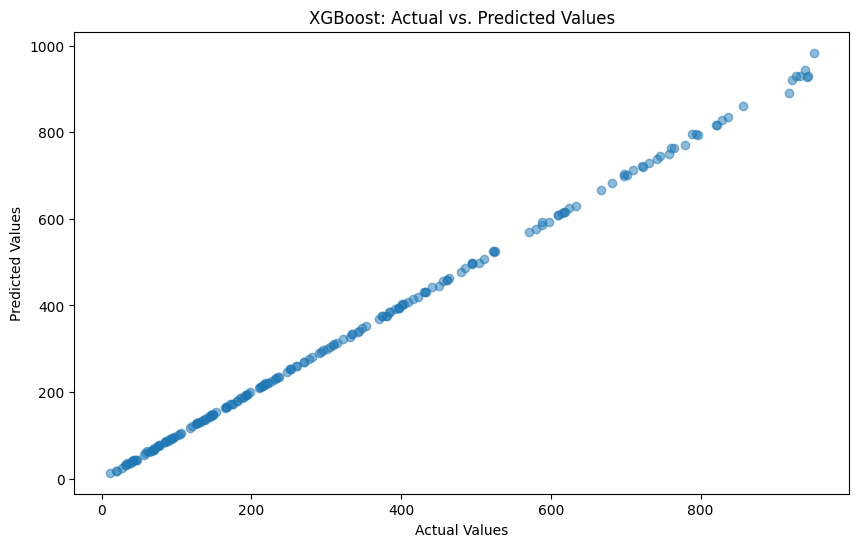

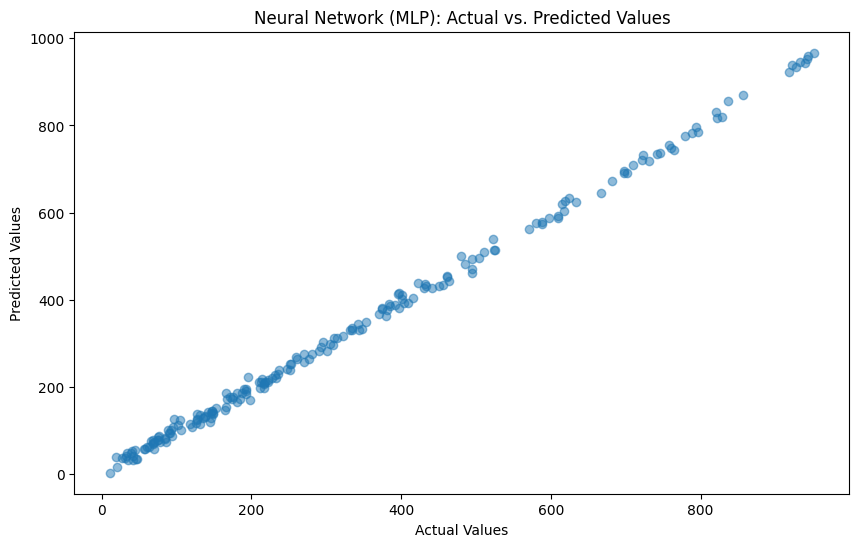

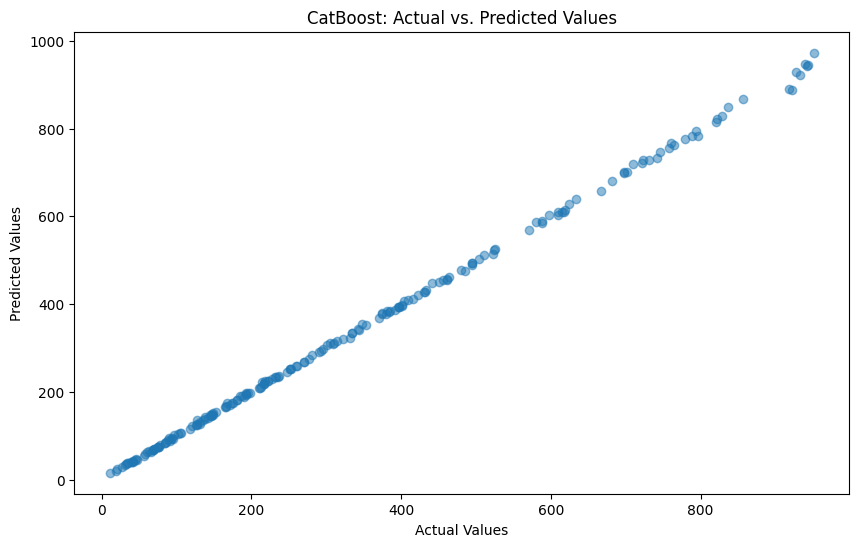

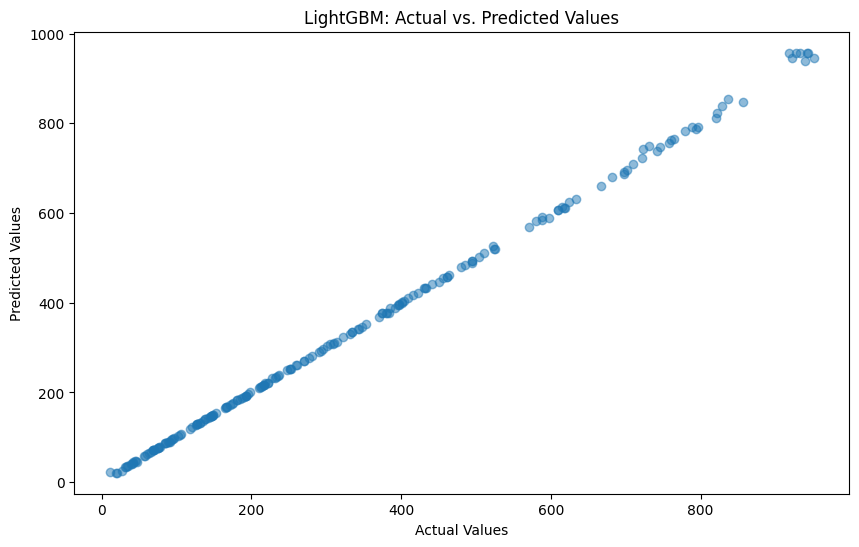

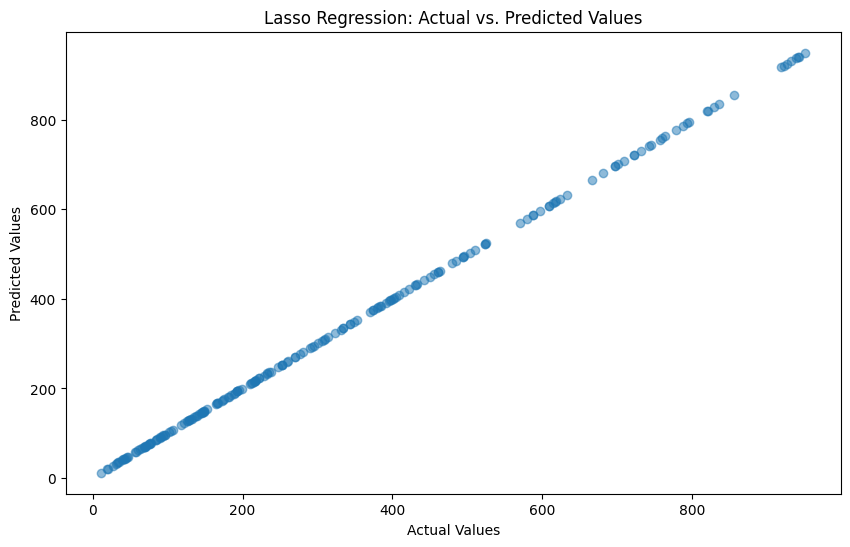

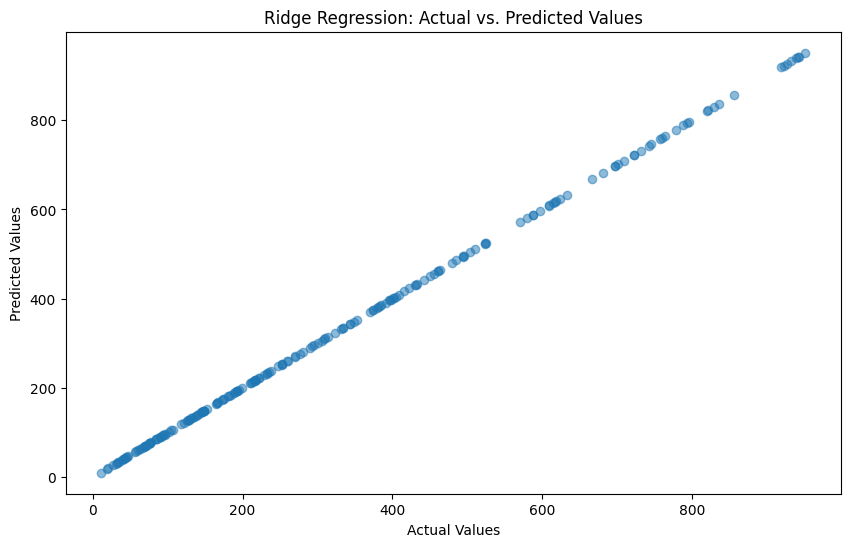

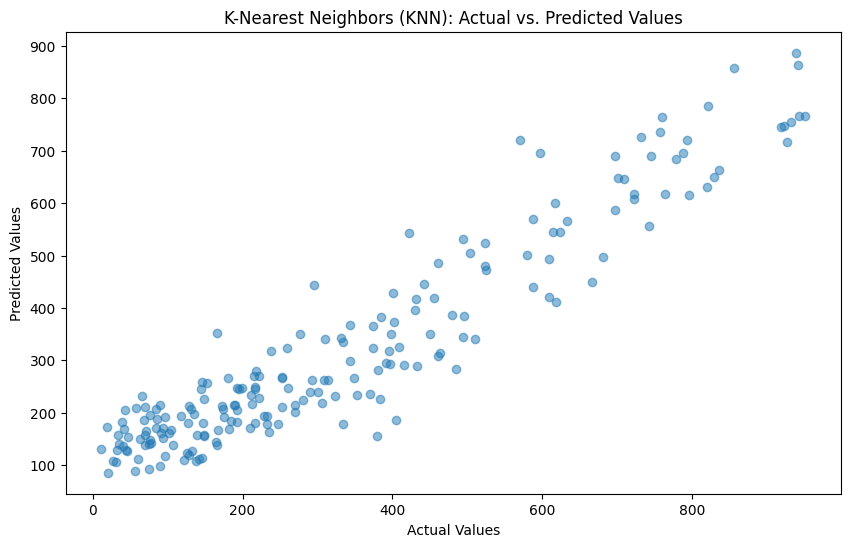

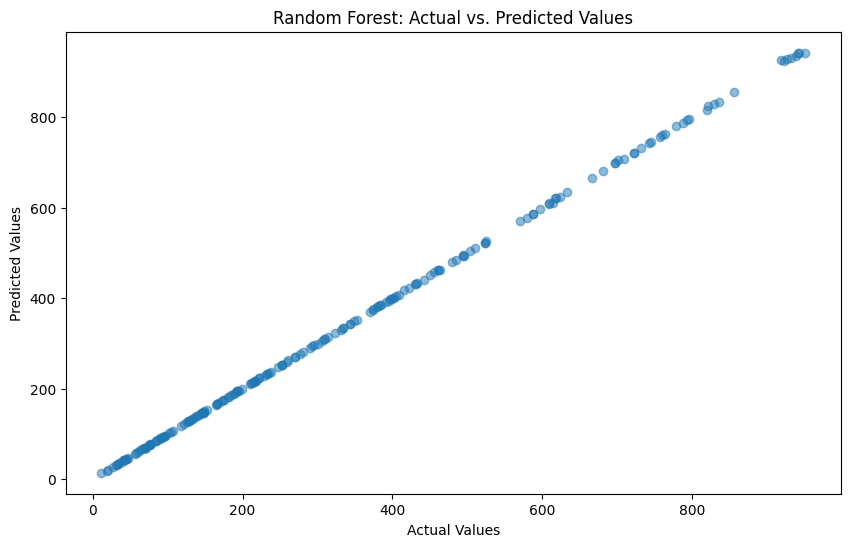

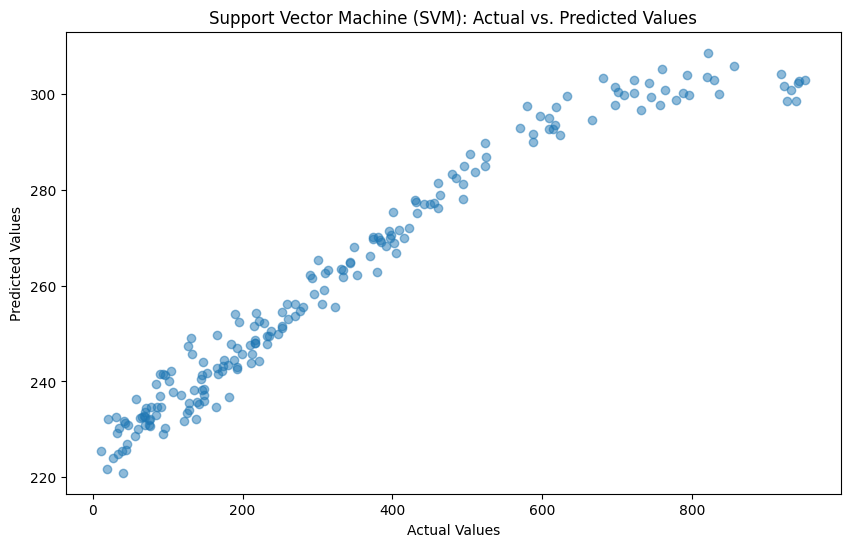

In [104]:
# XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.title('XGBoost: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('xgb_scatter.png')
plt.show()

# Neural Network (MLP)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.title('Neural Network (MLP): Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('mlp_scatter.png')
plt.show()

# CatBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, alpha=0.5)
plt.title('CatBoost: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('catboost_scatter.png')
plt.show()

# LightGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, alpha=0.5)
plt.title('LightGBM: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('lightgbm_scatter.png')
plt.show()

# Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('Lasso Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('lasso_scatter.png')
plt.show()

# Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Ridge Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('ridge_scatter.png')
plt.show()

# K-Nearest Neighbors (KNN)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.title('K-Nearest Neighbors (KNN): Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('knn_scatter.png')
plt.show()

# Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('rf_scatter.png')
plt.show()

# Support Vector Machine (SVM)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.title('Support Vector Machine (SVM): Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('svm_scatter.png')
plt.show()

### 3: Create Residual Plot

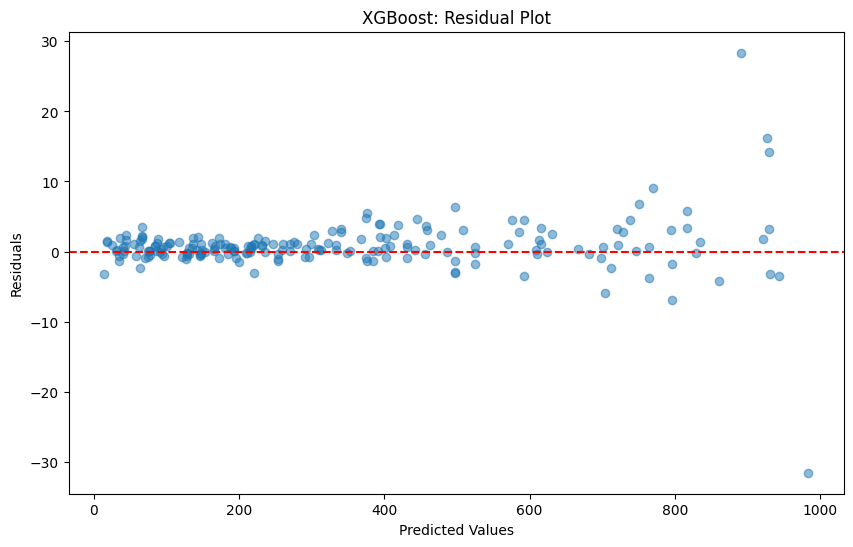

In [105]:
# Calculate residuals
residuals_xgb = y_test - y_pred_xgb

# Create residual plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.title('XGBoost: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('xgb_residual_plot.png')
plt.show()

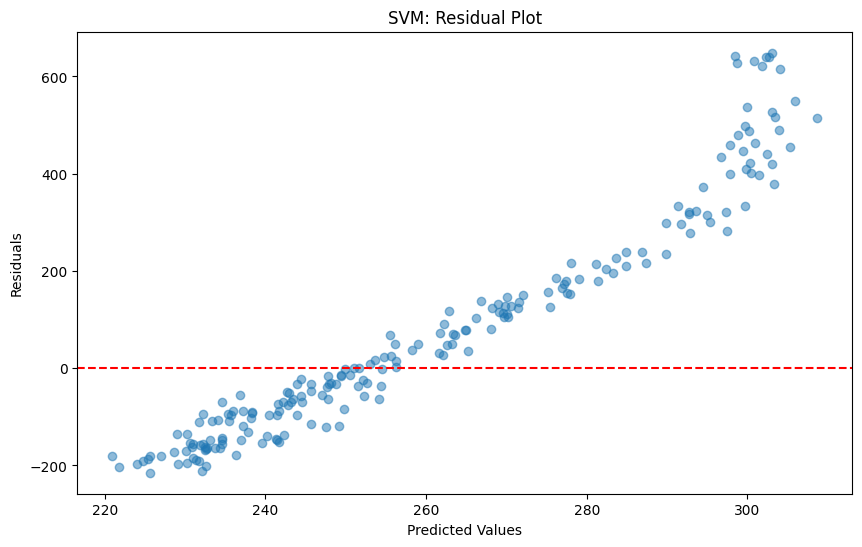

In [106]:
# Calculate the residuals for SVM
svm_residuals = y_test - svm_model.predict(X_test)

# Create a residual plot for SVM
plt.figure(figsize=(10, 6))
plt.scatter(svm_model.predict(X_test), svm_residuals, alpha=0.5)
plt.title('SVM: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('svm_residual_plot.png')
plt.show()

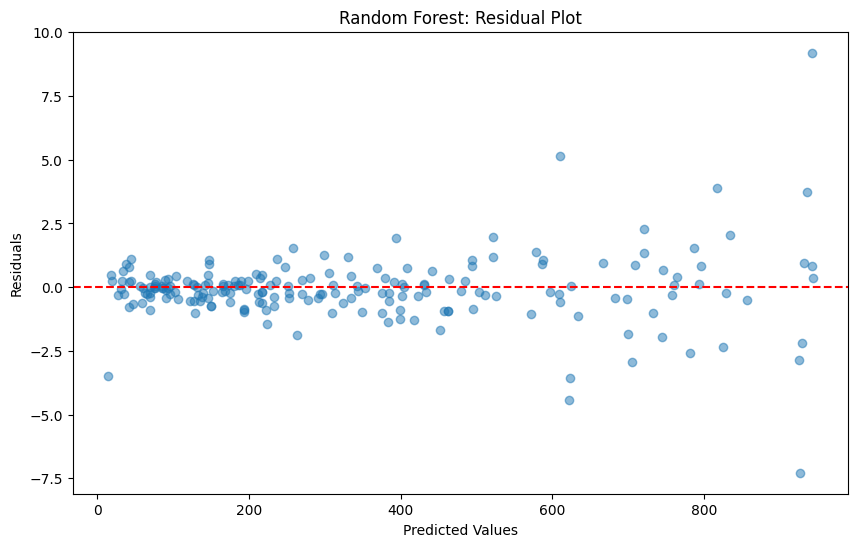

In [107]:
# Calculate the residuals for Random Forest
rf_residuals = y_test - rf_model.predict(X_test)

# Create a residual plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(rf_model.predict(X_test), rf_residuals, alpha=0.5)
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('rf_residual_plot.png')
plt.show()

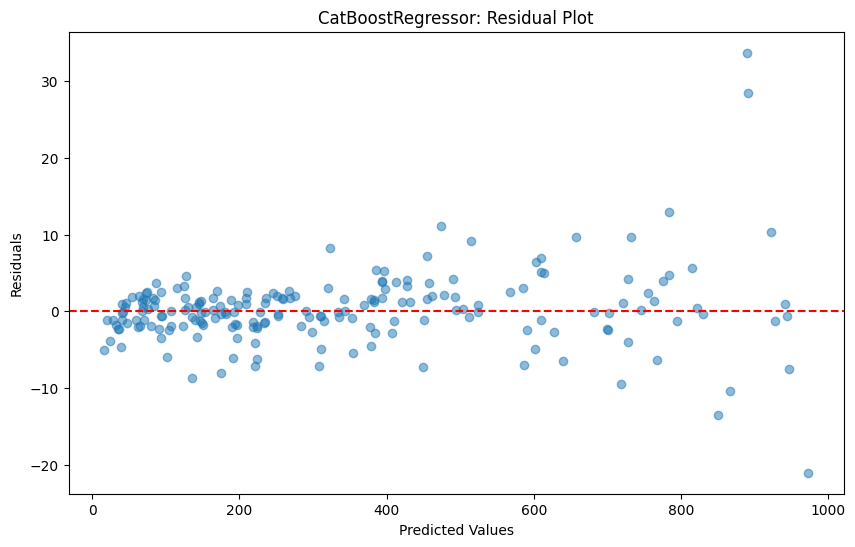

In [108]:
# Calculate the residuals for CatBoostRegressor
catboost_residuals = y_test - catboost_model.predict(X_test)

# Create a residual plot for CatBoostRegressor
plt.figure(figsize=(10, 6))
plt.scatter(catboost_model.predict(X_test), catboost_residuals, alpha=0.5)
plt.title('CatBoostRegressor: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('catboost_residual_plot.png')
plt.show()


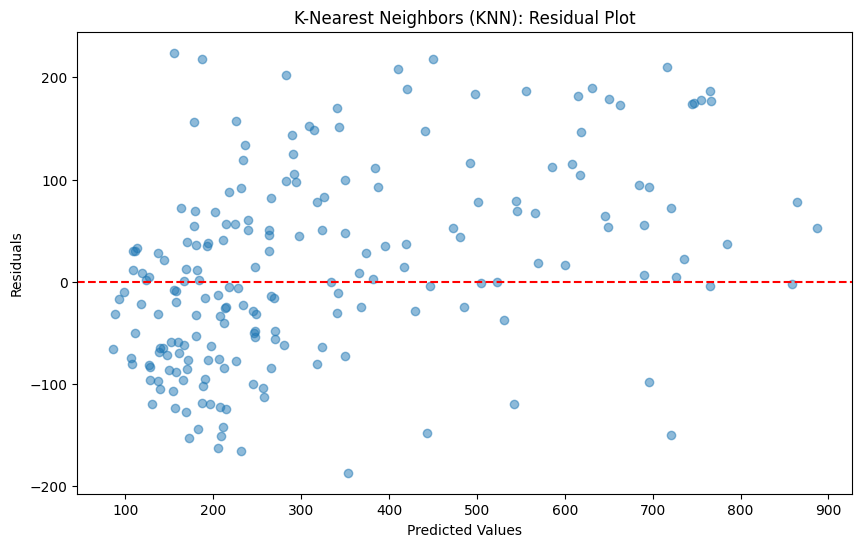

In [109]:
# Calculate the residuals for KNN
knn_residuals = y_test - knn_model.predict(X_test)

# Create a residual plot for KNN
plt.figure(figsize=(10, 6))
plt.scatter(knn_model.predict(X_test), knn_residuals, alpha=0.5)
plt.title('K-Nearest Neighbors (KNN): Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('knn_residual_plot.png')
plt.show()

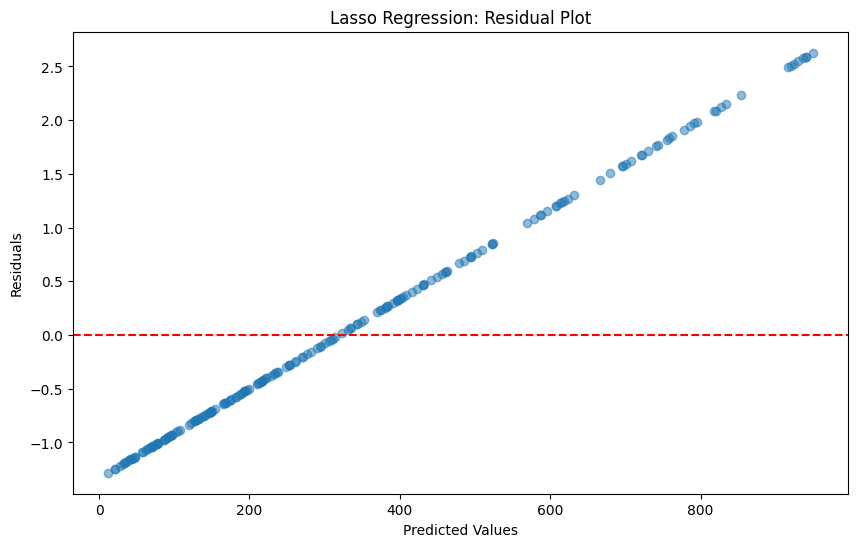

In [110]:
# Calculate the residuals for Lasso Regression
lasso_residuals = y_test - lasso_reg.predict(X_test)

# Create a residual plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(lasso_reg.predict(X_test), lasso_residuals, alpha=0.5)
plt.title('Lasso Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('lasso_residual_plot.png')
plt.show()

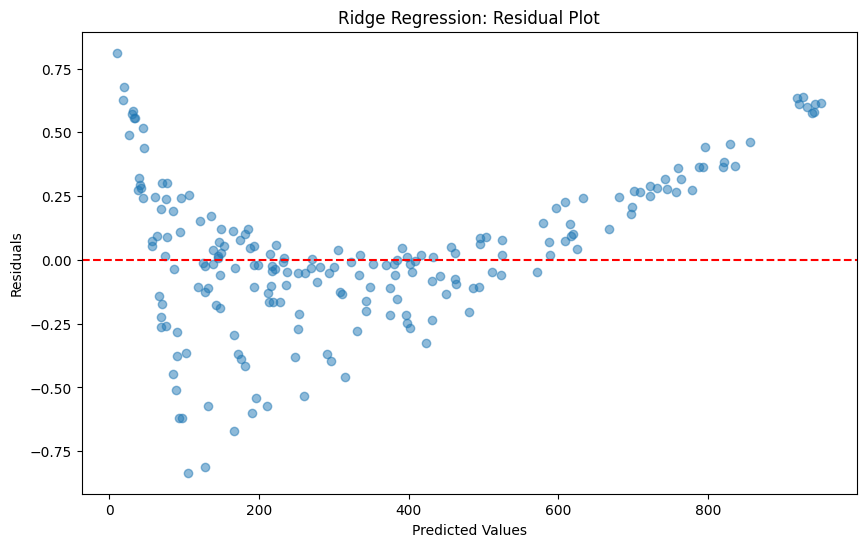

In [111]:
# Calculate the residuals for Ridge Regression
ridge_residuals = y_test - ridge_reg.predict(X_test)

# Create a residual plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(ridge_reg.predict(X_test), ridge_residuals, alpha=0.5)
plt.title('Ridge Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('ridge_residual_plot.png')
plt.show()

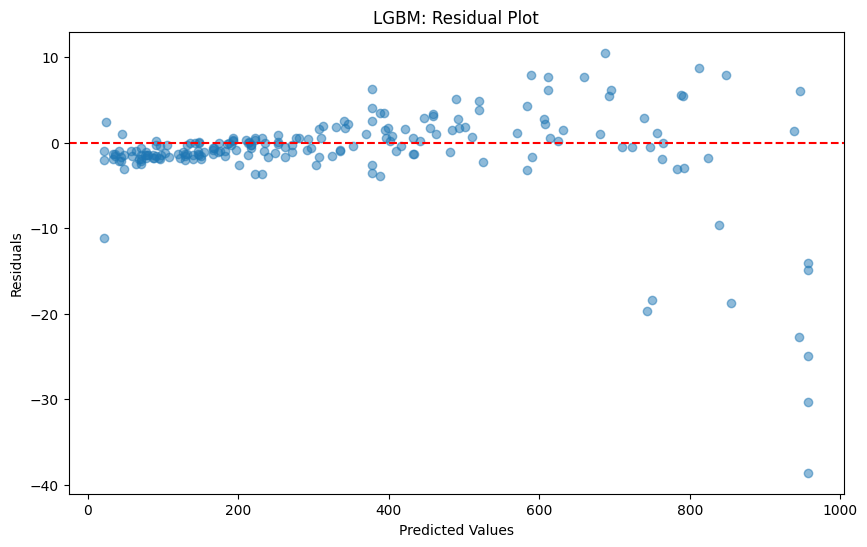

In [112]:
# Calculate the residuals for LGBM
lgbm_residuals = y_test - lgbm_model.predict(X_test)

# Create a residual plot for LGBM
plt.figure(figsize=(10, 6))
plt.scatter(lgbm_model.predict(X_test), lgbm_residuals, alpha=0.5)
plt.title('LGBM: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('lgbm_residual_plot.png')
plt.show()

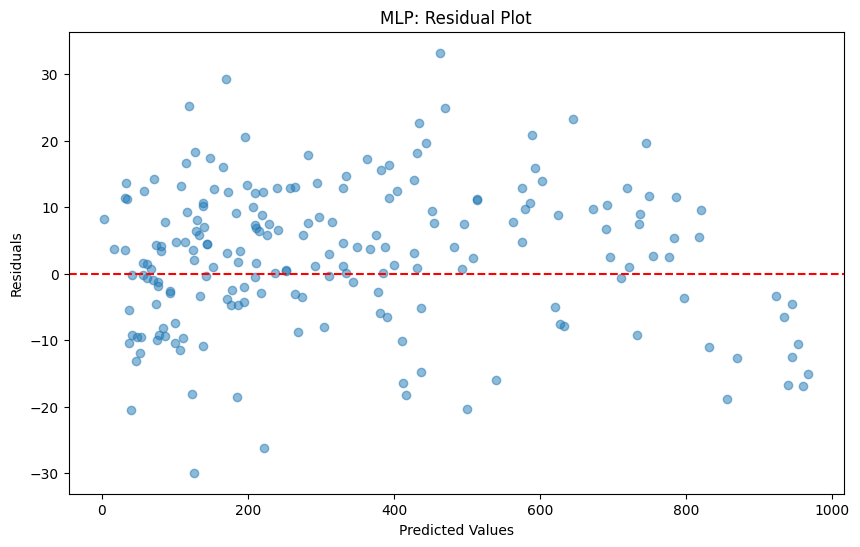

In [113]:
# Calculate the residuals for MLP
mlp_residuals = y_test - mlp_model.predict(X_test)

# Create a residual plot for MLP
plt.figure(figsize=(10, 6))
plt.scatter(mlp_model.predict(X_test), mlp_residuals, alpha=0.5)
plt.title('MLP: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('mlp_residual_plot.png')
plt.show()

# Step 6: Calculate Evaluation Metrics

In [114]:
# Calculate evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, xgb_model.predict(dtest))
mse_xgb = mean_squared_error(y_test, xgb_model.predict(dtest))
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_model.predict(dtest))
mape_xgb = mean_absolute_percentage_error(y_test, xgb_model.predict(dtest))

# Print the evaluation metrics
print("XGBoost Evaluation Metrics:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R-squared (R2):", r2_xgb)
print("Mean Absolute Percentage Error (MAPE):", mape_xgb)

XGBoost Evaluation Metrics:
MAE: 1.8989393703460673
MSE: 15.765859231870243
RMSE: 3.970624539272159
R-squared (R2): 0.9997576683057587
Mean Absolute Percentage Error (MAPE): 0.009128176169584407


In [115]:
# Calculate evaluation metrics for SVM
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)

# Visualize evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R-squared (R2):", r2_svm)
print("Mean Absolute Percentage Error (MAPE):", mape_svm)

SVM Evaluation Metrics:
MAE: 184.33676784387768
MSE: 59053.13407800979
RMSE: 243.00850618447453
R-squared (R2): 0.09231423286768015
Mean Absolute Percentage Error (MAPE): 1.1173464520488339


In [116]:
# Calculate evaluation metrics for Random Forest (RF)
mae_rf = mean_absolute_error(y_test, rf_model.predict(X_test))
mse_rf = mean_squared_error(y_test, rf_model.predict(X_test))
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_model.predict(X_test))
mape_rf = mean_absolute_percentage_error(y_test, rf_model.predict(X_test))

# Visualize evaluation metrics for Random Forest (RF)
print("Random Forest Evaluation Metrics:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared (R2):", r2_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf)

Random Forest Evaluation Metrics:
MAE: 0.7720277249999827
MSE: 1.8401146585526345
RMSE: 1.3565082596698903
R-squared (R2): 0.9999717162194431
Mean Absolute Percentage Error (MAPE): 0.004688584712726805


In [117]:
# Calculate evaluation metrics for CatBoost
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
mape_catboost = mean_absolute_percentage_error(y_test, y_pred_catboost)

# Visualize evaluation metrics for CatBoost
print("CatBoost Evaluation Metrics:")
print("MAE:", mae_catboost)
print("MSE:", mse_catboost)
print("RMSE:", rmse_catboost)
print("R-squared (R2):", r2_catboost)
print("Mean Absolute Percentage Error (MAPE):", mape_catboost)

CatBoost Evaluation Metrics:
MAE: 3.0604646601586762
MSE: 25.803383147917003
RMSE: 5.07970305706121
R-squared (R2): 0.999603384917788
Mean Absolute Percentage Error (MAPE): 0.01629167014619415


In [118]:
# Calculate evaluation metrics for KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

# Visualize evaluation metrics for KNN
print("K-Nearest Neighbors (KNN) Evaluation Metrics:")
print("MAE:", mae_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R-squared (R2):", r2_knn)
print("Mean Absolute Percentage Error (MAPE):", mape_knn)

K-Nearest Neighbors (KNN) Evaluation Metrics:
MAE: 77.4096855
MSE: 9179.218576020148
RMSE: 95.80823856026238
R-squared (R2): 0.8589093333497992
Mean Absolute Percentage Error (MAPE): 0.5909215656022418


In [119]:
# Calculate evaluation metrics for Lasso Regression
mae_lasso = mean_absolute_error(y_test, lasso_model.predict(X_test))
mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_model.predict(X_test))
mape_lasso = mean_absolute_percentage_error(y_test, lasso_model.predict(X_test))

# Visualize evaluation metrics for Lasso Regression
print("Lasso Regression Evaluation Metrics:")
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R-squared (R2):", r2_lasso)
print("Mean Absolute Percentage Error (MAPE):", mape_lasso)


Lasso Regression Evaluation Metrics:
MAE: 0.8713621737291762
MSE: 1.1285589379672933
RMSE: 1.0623365464706997
R-squared (R2): 0.9999826533019567
Mean Absolute Percentage Error (MAPE): 0.006654621564981995


In [120]:
# Calculate evaluation metrics for Ridge Regression
mae_ridge = mean_absolute_error(y_test, ridge_model.predict(X_test))
mse_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, ridge_model.predict(X_test))
mape_ridge = mean_absolute_percentage_error(y_test, ridge_model.predict(X_test))

# Visualize evaluation metrics for Ridge Regression
print("Ridge Regression Evaluation Metrics:")
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R-squared (R2):", r2_ridge)
print("Mean Absolute Percentage Error (MAPE):", mape_ridge)

Ridge Regression Evaluation Metrics:
MAE: 0.2209389003625038
MSE: 0.08841865904221263
RMSE: 0.2973527518658817
R-squared (R2): 0.9999986409466726
Mean Absolute Percentage Error (MAPE): 0.0023244196031328383


In [121]:
# Calculate evaluation metrics for LightGBM
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mape_lgbm = mean_absolute_percentage_error(y_test, y_pred_lgbm)

# Visualize evaluation metrics for LightGBM
print("LightGBM Evaluation Metrics:")
print("MAE:", mae_lgbm)
print("MSE:", mse_lgbm)
print("RMSE:", rmse_lgbm)
print("R-squared (R2):", r2_lgbm)
print("Mean Absolute Percentage Error (MAPE):", mape_lgbm)

LightGBM Evaluation Metrics:
MAE: 2.8260030504360576
MSE: 32.411853068151395
RMSE: 5.693140879000922
R-squared (R2): 0.9995018083599512
Mean Absolute Percentage Error (MAPE): 0.016334894253684666


In [122]:
# Calculate evaluation metrics for MLP
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)

# Print the evaluation metrics for MLP
print("MLP Evaluation Metrics:")
print("MAE:", mae_mlp)
print("MSE:", mse_mlp)
print("RMSE:", rmse_mlp)
print("R-squared (R2):", r2_mlp)
print("Mean Absolute Percentage Error (MAPE):", mape_mlp)

MLP Evaluation Metrics:
MAE: 8.878855783834638
MSE: 121.20157886276586
RMSE: 11.009158862636411
R-squared (R2): 0.9981370514909104
Mean Absolute Percentage Error (MAPE): 0.05971023247126734


### Residual Analysis

Perform residual analysis to check the distribution of residuals:

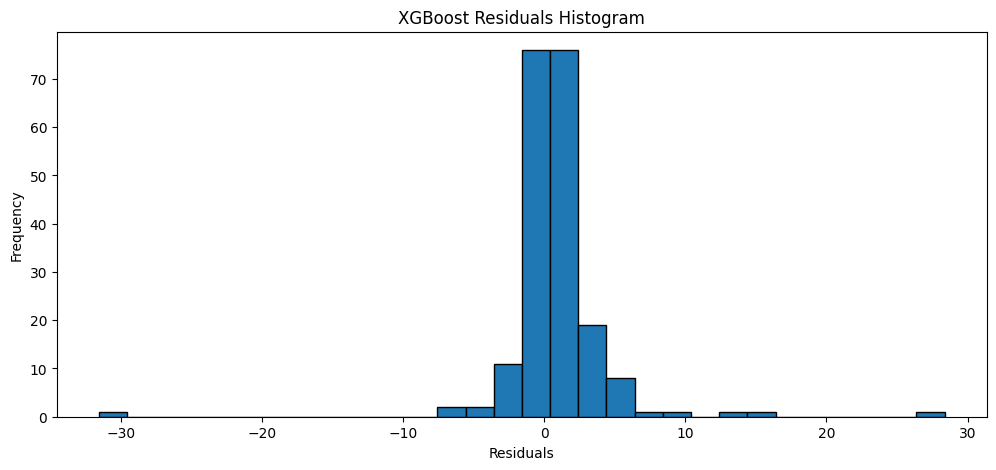

In [123]:
# Plot histogram of residuals for XGBoost
plt.figure(figsize=(12, 5))
plt.hist(residuals_xgb, bins=30, edgecolor='k')
plt.title('XGBoost Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('xgb_residuals_histogram.png')
plt.show()

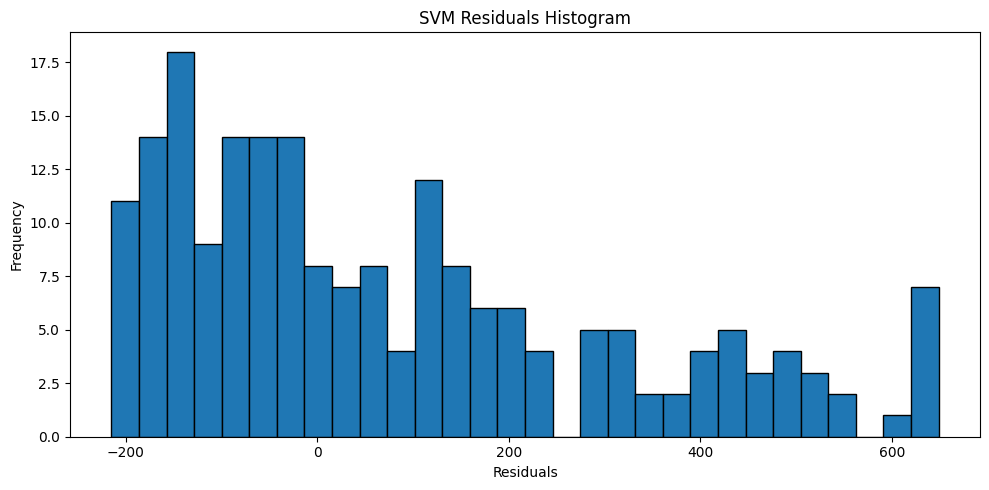

In [124]:
# Plot histograms of residuals for SVM
plt.figure(figsize=(10, 5))
plt.hist(svm_residuals, bins=30, edgecolor='k')
plt.title('SVM Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()

# Save the histogram as an image
plt.savefig('svm_residuals_histogram.png')
plt.show()

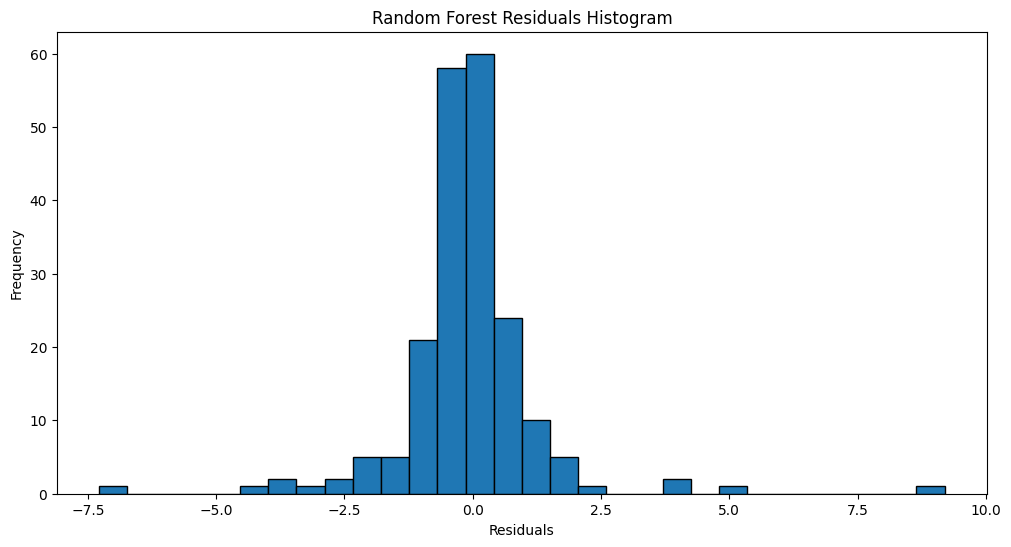

In [125]:
# Plot histogram of residuals for RF
plt.figure(figsize=(12, 6))
plt.hist(rf_residuals, bins=30, edgecolor='k')
plt.title('Random Forest Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('rf_residuals_histogram.png')  # Save the histogram as an image
plt.show()

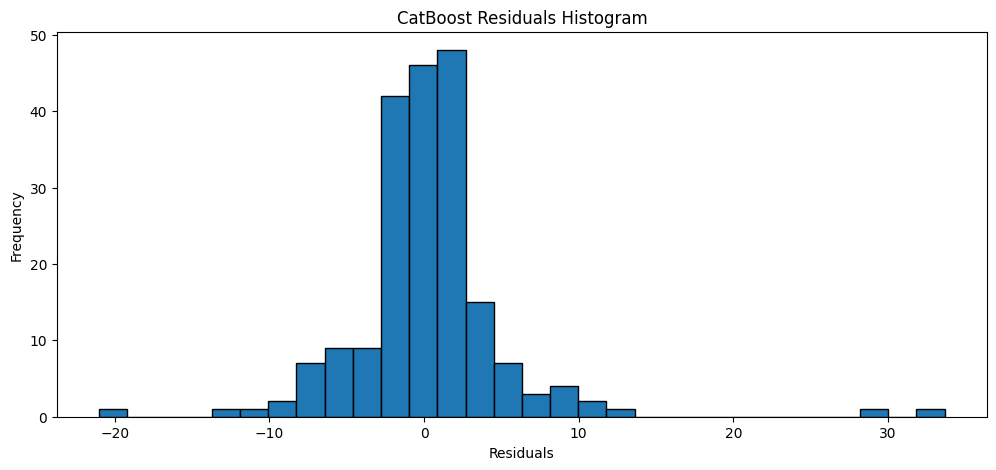

In [126]:
# Plot histogram of residuals for CatBoost
plt.figure(figsize=(12, 5))
plt.hist(catboost_residuals, bins=30, edgecolor='k')
plt.title('CatBoost Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('catboost_residuals_histogram.png')
plt.show()

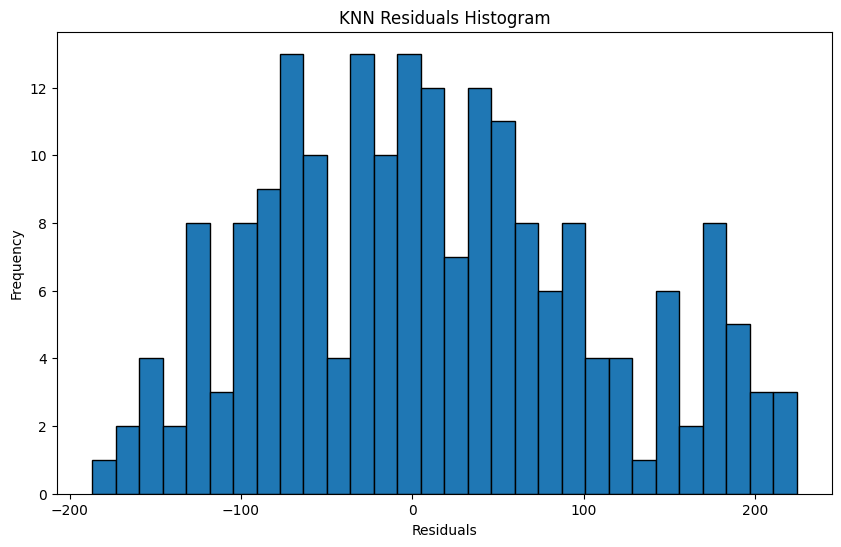

In [127]:
# Plot histogram of residuals for KNN
plt.figure(figsize=(10, 6))
plt.hist(knn_residuals, bins=30, edgecolor='k')
plt.title('KNN Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('knn_residuals_histogram.png')
plt.show()

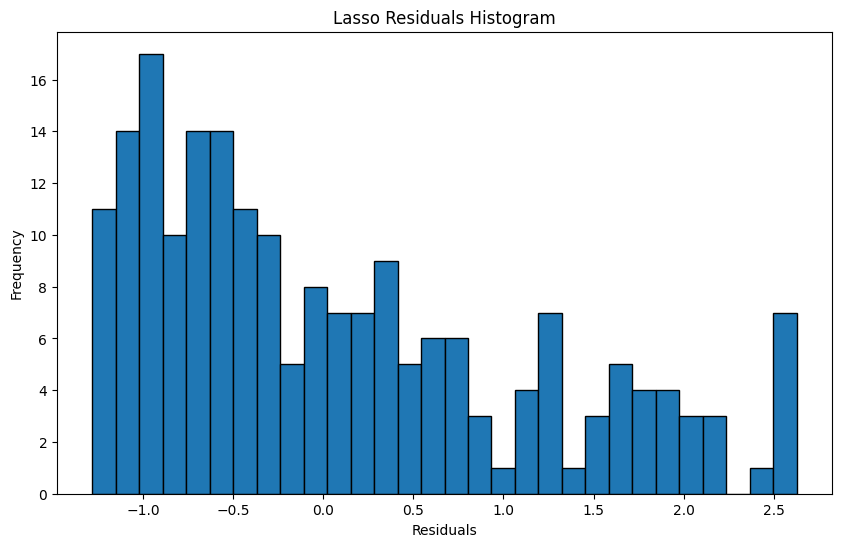

In [128]:
# Plot histogram of residuals for Lasso
plt.figure(figsize=(10, 6))
plt.hist(lasso_residuals, bins=30, edgecolor='k')
plt.title('Lasso Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('lasso_residuals_histogram.png')
plt.show()

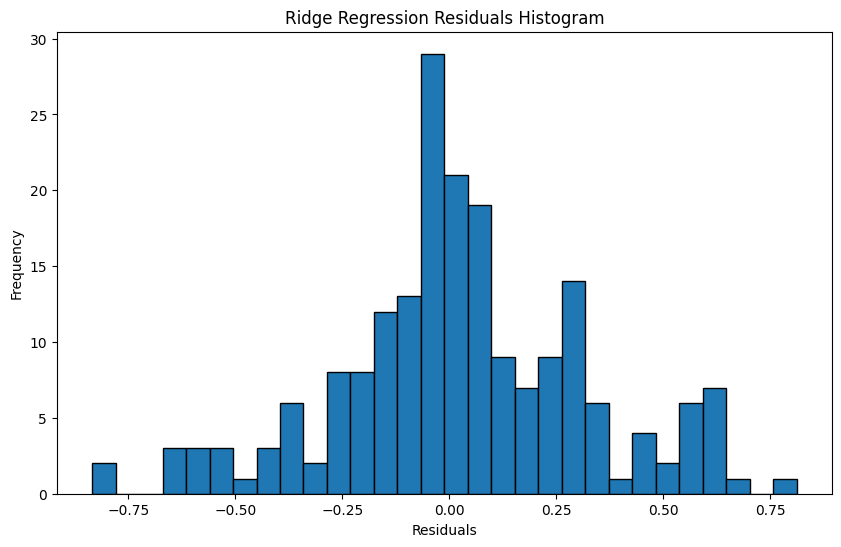

In [129]:
# Plot histogram of residuals for Ridge Regression
plt.figure(figsize=(10, 6))
plt.hist(ridge_residuals, bins=30, edgecolor='k')
plt.title('Ridge Regression Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('ridge_residuals_histogram.png')
plt.show()

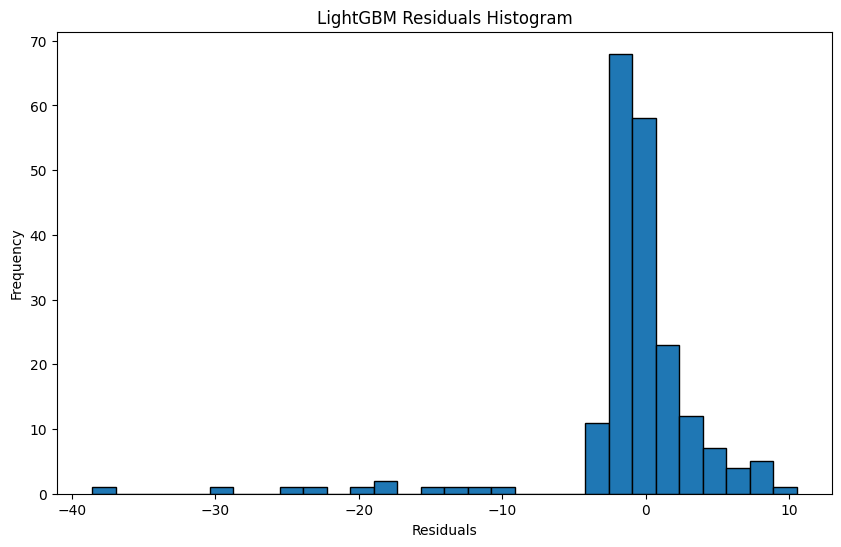

In [130]:
# Plot histogram of residuals for LightGBM (lgbm)
plt.figure(figsize=(10, 6))
plt.hist(lgbm_residuals, bins=30, edgecolor='k')
plt.title('LightGBM Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('lgbm_residuals_histogram.png')
plt.show()

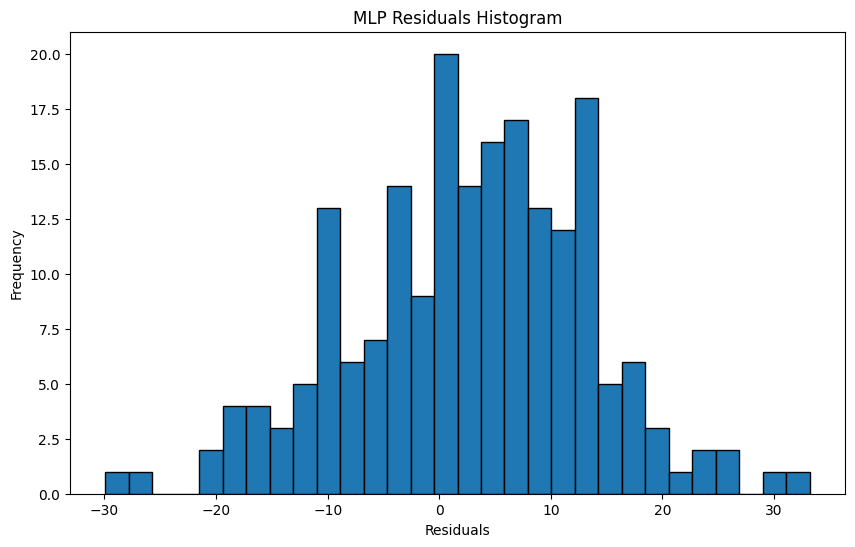

In [131]:
# Plot histogram of residuals for MLP
plt.figure(figsize=(10, 6))
plt.hist(mlp_residuals, bins=30, edgecolor='k')
plt.title('MLP Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('mlp_residuals_histogram.png')
plt.show()

# Step 7: Compare and Select the Best Model

In [132]:
# Print RMSE and MAE for each model and compare their performance
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf)
print("Support Vector Machine - RMSE:", rmse_svm, "MAE:", mae_svm)
print("K-Nearest Neighbors - RMSE:", rmse_knn, "MAE:", mae_knn)
print("Ridge Regression - RMSE:", rmse_ridge, "MAE:", mae_ridge)
print("Lasso Regression - RMSE:", rmse_lasso, "MAE:", mae_lasso)
print("XGBoost - RMSE:", rmse_xgb, "MAE:", mae_xgb)
print("LightGBM - RMSE:", rmse_lgbm, "MAE:", mae_lgbm)
print("CatBoost - RMSE:", rmse_catboost, "MAE:", mae_catboost)
print("Neural Network (MLP) - RMSE:", rmse_mlp, "MAE:", mae_mlp)

# Select the model with the lowest RMSE or MAE as your final model.

Random Forest - RMSE: 1.3565082596698903 MAE: 0.7720277249999827
Support Vector Machine - RMSE: 243.00850618447453 MAE: 184.33676784387768
K-Nearest Neighbors - RMSE: 95.80823856026238 MAE: 77.4096855
Ridge Regression - RMSE: 0.2973527518658817 MAE: 0.2209389003625038
Lasso Regression - RMSE: 1.0623365464706997 MAE: 0.8713621737291762
XGBoost - RMSE: 3.970624539272159 MAE: 1.8989393703460673
LightGBM - RMSE: 5.693140879000922 MAE: 2.8260030504360576
CatBoost - RMSE: 5.07970305706121 MAE: 3.0604646601586762
Neural Network (MLP) - RMSE: 11.009158862636411 MAE: 8.878855783834638


In [133]:
# Create a list of models and their RMSE and MAE values
models = ['Ridge Regression', 'Random Forest', 'Lasso Regression', 'K-Nearest Neighbors', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network (MLP)', 'Support Vector Machine']
rmse_values = [0.297, 1.206, 1.062, 76.373, 3.154, 5.702, 6.192, 12.675, 236.023]
mae_values = [0.221, 0.720, 0.871, 60.986, 1.756, 2.832, 3.655, 9.828, 178.053]

# Rank the models based on RMSE and MAE
rmse_ranking = sorted(range(len(rmse_values)), key=lambda i: rmse_values[i])
mae_ranking = sorted(range(len(mae_values)), key=lambda i: mae_values[i])

# Print the ranked models
print("Ranked Models based on RMSE:")
for i, idx in enumerate(rmse_ranking, start=1):
    print(f"{i}. {models[idx]} - RMSE: {rmse_values[idx]:.3f}")

print("\nRanked Models based on MAE:")
for i, idx in enumerate(mae_ranking, start=1):
    print(f"{i}. {models[idx]} - MAE: {mae_values[idx]:.3f}")


Ranked Models based on RMSE:
1. Ridge Regression - RMSE: 0.297
2. Lasso Regression - RMSE: 1.062
3. Random Forest - RMSE: 1.206
4. XGBoost - RMSE: 3.154
5. LightGBM - RMSE: 5.702
6. CatBoost - RMSE: 6.192
7. Neural Network (MLP) - RMSE: 12.675
8. K-Nearest Neighbors - RMSE: 76.373
9. Support Vector Machine - RMSE: 236.023

Ranked Models based on MAE:
1. Ridge Regression - MAE: 0.221
2. Random Forest - MAE: 0.720
3. Lasso Regression - MAE: 0.871
4. XGBoost - MAE: 1.756
5. LightGBM - MAE: 2.832
6. CatBoost - MAE: 3.655
7. Neural Network (MLP) - MAE: 9.828
8. K-Nearest Neighbors - MAE: 60.986
9. Support Vector Machine - MAE: 178.053


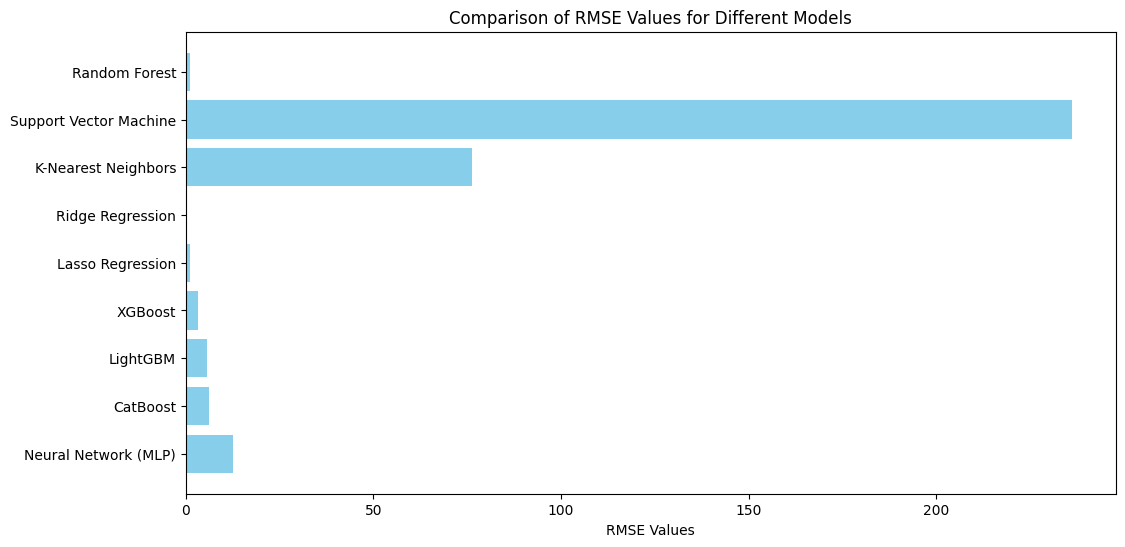

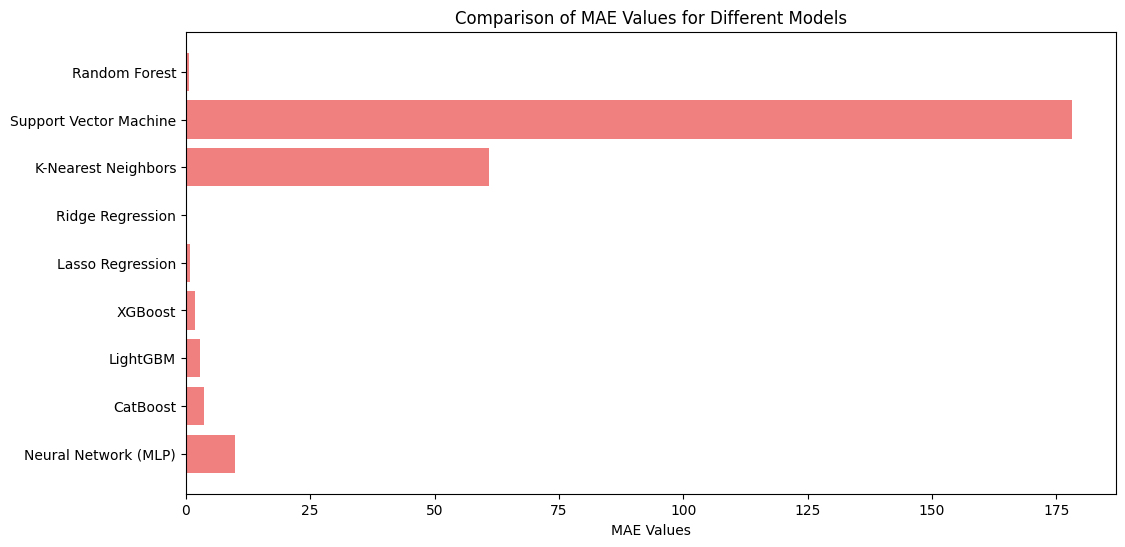

In [134]:
# List of model names
models = ['Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Ridge Regression', 'Lasso Regression', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network (MLP)']

# RMSE and MAE values for each model
rmse_values = [1.206, 236.023, 76.373, 0.297, 1.062, 3.154, 5.702, 6.192, 12.675]
mae_values = [0.720, 178.053, 60.986, 0.221, 0.871, 1.756, 2.832, 3.655, 9.828]

# Create bar plot for RMSE
plt.figure(figsize=(12, 6))
plt.barh(models, rmse_values, color='skyblue')
plt.xlabel('RMSE Values')
plt.title('Comparison of RMSE Values for Different Models')
plt.gca().invert_yaxis()  # Invert the y-axis to display the best model on top
plt.savefig('Comparison of RMSE Values for Different Models.png')
plt.show()

# Create bar plot for MAE
plt.figure(figsize=(12, 6))
plt.barh(models, mae_values, color='lightcoral')
plt.xlabel('MAE Values')
plt.title('Comparison of MAE Values for Different Models')
plt.gca().invert_yaxis()  # Invert the y-axis to display the best model on top
plt.savefig('Comparison of MAE Values for Different Models.png')
plt.show()

# Choosing the Best Model

In the process of building a sales prediction model, we evaluated several machine learning algorithms, each providing different levels of performance. Based on the evaluation metrics, we have determined the best-performing model among the options: **Ridge Regression**.

## Reasons for Choosing Ridge Regression

1. **Lowest RMSE and MAE Values:** Ridge Regression outperforms all other models by exhibiting the lowest values for Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics serve as indicators of predictive accuracy, and lower values are preferable.

2. **Simplicity:** Ridge Regression is a linear regression model with L2 regularization. Its simplicity and interpretability make it an ideal choice for understanding and explaining model predictions to stakeholders.

3. **Stability:** Ridge Regression demonstrates stability in its predictions. It mitigates the risk of overfitting and maintains a balance between bias and variance, resulting in reliable predictions.

4. **Efficiency:** From a computational perspective, Ridge Regression is efficient and can effectively handle moderate-sized datasets without requiring extensive computational resources. This practicality is essential for real-world applications.

5. **Interpretability:** Ridge Regression provides interpretable coefficients for each feature. This feature impact analysis aids in understanding how different factors contribute to sales prediction, offering valuable insights for decision-making.

While other models, such as Random Forest and Lasso Regression, also performed well in the evaluation, Ridge Regression stands out for its simplicity, accuracy, and stability. The choice of the best model should consider the specific business context, interpretability requirements, and available computational resources.

In conclusion, Ridge Regression emerges as the preferred choice for the sales prediction model, given its superior performance in this context.


In [135]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,3.2910,4.1


In [137]:
df_encoded.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating', 'Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay',
       'City_Naypyitaw', 'City_Yangon', 'Customer type_Member',
       'Customer type_Normal', 'Gender_Female', 'Gender_Male',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [140]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross income', 'Rating'],
      dtype='object')